In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

plt.style.use('seaborn-notebook')


In [3]:

df2 = pd.read_csv("2017.csv", engine='python')
df3 = pd.read_csv("2018.csv", engine='python')
df4 = pd.read_csv("2019.csv", engine='python')

df2['Year']=2017
df3['Year']=2018
df4['Year']=2019

chains=["McDonald's", "Starbucks", "Subway", "Domino's" ,"Taco Bell", "Burger King", "KFC", "Pizza Hut"]

df2017 = df2.loc[df2['Chain'].isin(chains)]
df2018 = df3.loc[df3['Chain'].isin(chains)]
df2019 = df4.loc[df4['Chain'].isin(chains)]



In [4]:
df2017 = df2017.drop(labels=['Rank', 'Menu Category'], axis=1)
df2018 = df2018.drop(labels=['Rank', 'Menu Category'], axis=1)
df2019 = df2019.drop(labels=['Rank', 'Menu Category'], axis=1)


In [5]:
df2017.head()

,Chain,Sales,Units,Year
0,McDonald's,"37,639","14,036",2017
1,Starbucks,"17,650","13,930",2017
2,Subway,"10,800","25,908",2017
3,Taco Bell,"9,790","6,446",2017
4,Burger King,"9,645","7,226",2017


In [6]:
df2018.head()

,Chain,Sales,Units,Year
0,McDonald's,"$38,524","13,914",2018
1,Starbucks,"$19,660*","14,606",2018
2,Subway,"$10,410","24,798",2018
3,Taco Bell,"$10,360","6,588",2018
5,Burger King,"$9,939","7,330",2018


In [7]:
df2019.head()

,Chain,Sales,Units,Year
0,McDonald's,"$40,412","13,846",2019
1,Starbucks,"$21,380*","15,049",2019
3,Taco Bell,"$11,293","6,766",2019
4,Burger King,"$10,204","7,346",2019
5,Subway,"$10,200","23,801",2019


In [8]:

del df3
del df4

newrow = {'Chain' : "Domino's",
          'Sales' : "5,925",
          'Units' : "5,587" ,
          'Year' : '2017'}

df2017 = df2017.append(newrow , ignore_index=True)

del df2

df = pd.concat([df2017, df2018, df2019])

In [9]:
df

,Chain,Sales,Units,Year
0,McDonald's,"37,639","14,036",2017
1,Starbucks,"17,650","13,930",2017
2,Subway,"10,800","25,908",2017
3,Taco Bell,"9,790","6,446",2017
4,Burger King,"9,645","7,226",2017
5,Pizza Hut,"5,510","7,522",2017
6,KFC,"4,417","4,109",2017
7,Domino's,"5,925","5,587",2017
0,McDonald's,"$38,524","13,914",2018
1,Starbucks,"$19,660*","14,606",2018


In [12]:
df.Sales = df.Sales.str.replace(',', '')
df.Sales = df.Sales.str.replace('$', '')
df.Sales = df.Sales.str.replace('*', '')

df.Units = df.Units.str.replace(',', '')
df.Units = df.Units.str.replace('$', '')
df.Units = df.Units.str.replace('*', '')

df['Year'] = df['Year'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Chain   24 non-null     object
 1   Sales   24 non-null     object
 2   Units   24 non-null     object
 3   Year    24 non-null     object
dtypes: object(4)
memory usage: 960.0+ bytes


In [13]:
dfSales= df.pivot(index = 'Chain', columns = 'Year', values='Sales')

dfUnits= df.pivot(index='Chain', columns='Year', values='Units')




In [14]:

dfSales[['2017', '2018', '2019']] = dfSales[['2017', '2018', '2019']].astype(int)

dfUnits[['2017', '2018', '2019']] = dfUnits[[ '2017', '2018', '2019']].astype(int)



In [15]:
print (dfSales)

print(dfUnits)

Year          2017   2018   2019
Chain                           
Burger King   9645   9939  10204
Domino's      5925   6591   7044
KFC           4417   4433   4546
McDonald's   37639  38524  40412
Pizza Hut     5510   5526   5558
Starbucks    17650  19660  21380
Subway       10800  10410  10200
Taco Bell     9790  10360  11293
Year          2017   2018   2019
Chain                           
Burger King   7226   7330   7346
Domino's      5587   5876   6126
KFC           4109   4074   4065
McDonald's   14036  13914  13846
Pizza Hut     7522   7482   7306
Starbucks    13930  14606  15049
Subway       25908  24798  23801
Taco Bell     6446   6588   6766


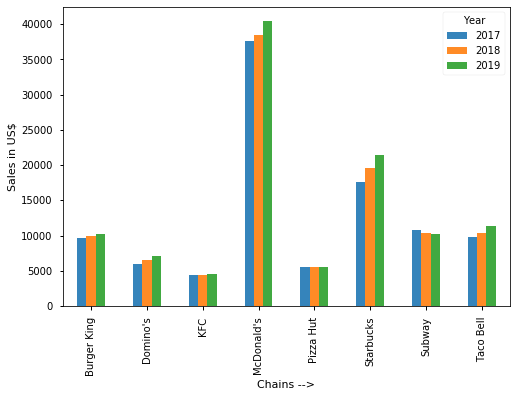

In [16]:
dfSales.plot.bar(stacked=False, alpha=0.9)
plt.xlabel("Chains -->")
plt.ylabel("Sales in US$")
plt.savefig("SalesFastFood.png", dpi=250, bbox_inches = 'tight')


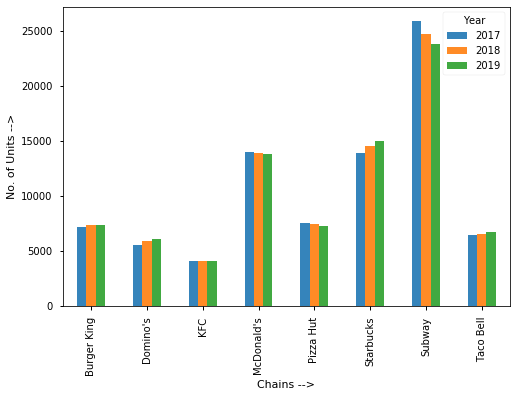

In [17]:
dfUnits.plot.bar(stacked=False, alpha=0.9)
plt.xlabel("Chains -->")
plt.ylabel("No. of Units -->")
plt.savefig("UnitsFastFood.png", dpi=250, bbox_inches = 'tight')

In [18]:
'''Food Services and Drinking Places in USA'''

dffooddrinks = pd.read_csv("Food-Services-Drinkingplaces.csv")

dffooddrinks['Value'] = dffooddrinks['Value'].str.replace(',', '')
dffooddrinks['Value'] = dffooddrinks['Value'].astype(float)

import datetime

dffooddrinks['Period']=pd.to_datetime(dffooddrinks['Period'], format='%b-%y')
dffooddrinks

,Period,Value
0,2016-01-01,50087.0
1,2016-02-01,51495.0
2,2016-03-01,55878.0
3,2016-04-01,56336.0
4,2016-05-01,57015.0
5,2016-06-01,54609.0
6,2016-07-01,56000.0
7,2016-08-01,55169.0
8,2016-09-01,54270.0
9,2016-10-01,55691.0


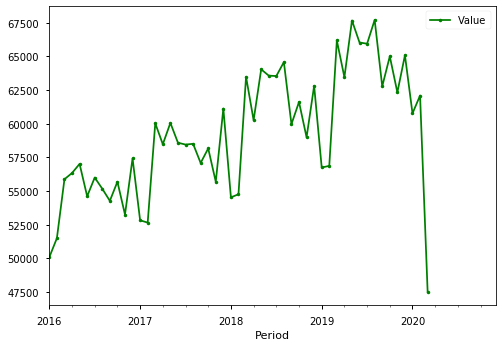

In [19]:
dffooddrinks.plot(kind= 'line', x='Period', y='Value', color = 'green' , marker = '.' )
plt.savefig("FoodDrinksPlacesUSA.png", dpi=250, bbox_inches='tight')

In [20]:
df=dffooddrinks
df.rename(columns={'Period' : 'ds', 'Value' : 'y'}, inplace=True)
df

,ds,y
0,2016-01-01,50087.0
1,2016-02-01,51495.0
2,2016-03-01,55878.0
3,2016-04-01,56336.0
4,2016-05-01,57015.0
5,2016-06-01,54609.0
6,2016-07-01,56000.0
7,2016-08-01,55169.0
8,2016-09-01,54270.0
9,2016-10-01,55691.0


In [21]:
from fbprophet import Prophet
m=Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=60, freq='M', include_history = True)

forecast = m.predict(future)

forecast.tail()

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
115,2025-07-31,77785.609145,81391.117020,87545.588908,77729.928545,77835.854644,6677.498682,6677.498682,6677.498682,6677.498682,6677.498682,6677.498682,0.0,0.0,0.0,84463.107827
116,2025-08-31,78002.485980,73715.600340,79937.331655,77945.030400,78053.533004,-1157.883141,-1157.883141,-1157.883141,-1157.883141,-1157.883141,-1157.883141,0.0,0.0,0.0,76844.602839
117,2025-09-30,78212.366788,77011.446774,82950.553869,78153.628993,78264.434641,1728.097802,1728.097802,1728.097802,1728.097802,1728.097802,1728.097802,0.0,0.0,0.0,79940.464590
118,2025-10-31,78429.243623,73807.046551,80122.199349,78369.300455,78482.605909,-1469.890995,-1469.890995,-1469.890995,-1469.890995,-1469.890995,-1469.890995,0.0,0.0,0.0,76959.352628
119,2025-11-30,78639.124431,75028.642526,81541.477978,78578.002235,78693.995136,-260.404102,-260.404102,-260.404102,-260.404102,-260.404102,-260.404102,0.0,0.0,0.0,78378.720329


In [22]:
dfnew = forecast[['ds', 'yhat']]
dfnew
dfnew.to_csv("dfnew.csv")

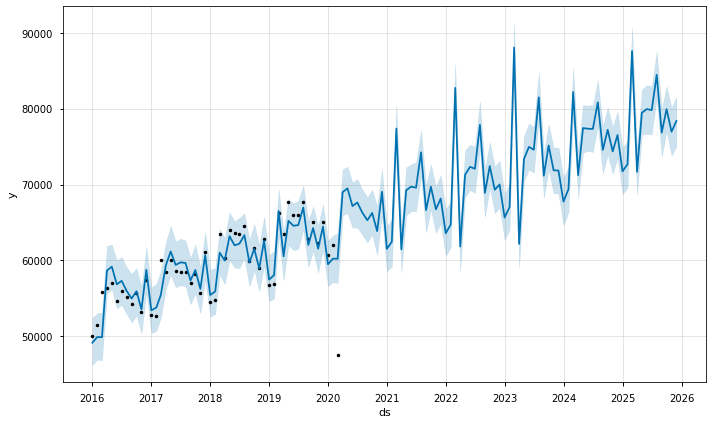

In [23]:
m.plot(forecast)
plt.savefig("fooddrinksfbprophetanal.png", dpi=240, bbox_inches='tight')

In [31]:
dfnew=pd.read_csv("dfnew.csv")
dfnew['yhat'] = dfnew['yhat'].astype(float)
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  120 non-null    int64  
 1   ds          120 non-null    object 
 2   yhat        120 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ KB


In [41]:
dfnew['ds'] = pd.to_datetime(dfnew['ds'])
dfnew.tail()

,Unnamed: 0,ds,yhat
115,115,2025-07-31,84463.10783
116,116,2025-08-31,76844.60284
117,117,2025-09-30,79940.46459
118,118,2025-10-31,76959.35263
119,119,2025-11-30,78378.72033


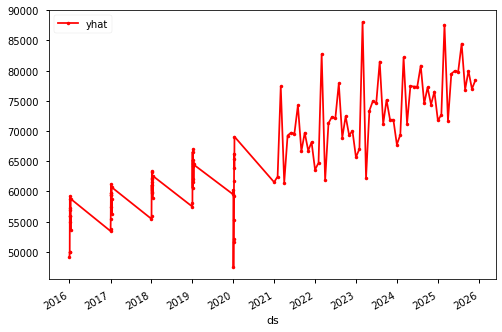

In [37]:
dfnew.plot(kind= 'line', x='ds', y='yhat', color = 'red' , marker = '.' )
plt.savefig("fooddrinkUSA.png", dpi=250, bbox_inches='tight')

In [54]:
dfretail = pd.read_csv("Retail-Trade-and-Food-Services.csv")
dfretail['Value'] = dfretail['Value'].str.replace(',', '')
dfretail['Value'] = dfretail['Value'].astype(float)
dfretail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Period  60 non-null     object 
 1   Value   51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


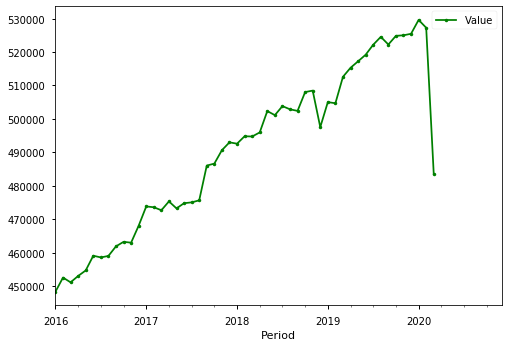

In [56]:
import datetime

dfretail['Period']=pd.to_datetime(dffooddrinks['Period'], format='%b-%y')
dfretail.plot(kind='line', x='Period', y='Value', color='green', marker='.')
plt.savefig("RetailUSAprecorona.png", dpi=240, bbox_inches='tight')

,Period,Value
55,2020-08-01,NaN
56,2020-09-01,NaN
57,2020-10-01,NaN
58,2020-11-01,NaN
59,2020-12-01,NaN


In [45]:
df=dfretail
df.rename(columns={'Period' : 'ds', 'Value' : 'y'}, inplace=True)
df

,ds,y
0,2016-01-01,448325.0
1,2016-02-01,452555.0
2,2016-03-01,451132.0
3,2016-04-01,453034.0
4,2016-05-01,454683.0
5,2016-06-01,459088.0
6,2016-07-01,458579.0
7,2016-08-01,459022.0
8,2016-09-01,461893.0
9,2016-10-01,463240.0


In [46]:
m=Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=60, freq='M', include_history = True)

forecast = m.predict(future)

forecast.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
115,2025-07-31,588574.826558,580969.124871,609429.276184,576303.220166,599955.896641,7104.662668,7104.662668,7104.662668,7104.662668,7104.662668,7104.662668,0.0,0.0,0.0,595679.489227
116,2025-08-31,589600.609461,575585.710464,604099.968141,576960.277959,601159.527762,1053.697233,1053.697233,1053.697233,1053.697233,1053.697233,1053.697233,0.0,0.0,0.0,590654.306694
117,2025-09-30,590593.302593,583254.535569,611449.467627,577863.659925,602333.648018,7062.513750,7062.513750,7062.513750,7062.513750,7062.513750,7062.513750,0.0,0.0,0.0,597655.816343
118,2025-10-31,591619.085496,583571.394016,612808.040471,578731.096808,603512.041086,6823.562762,6823.562762,6823.562762,6823.562762,6823.562762,6823.562762,0.0,0.0,0.0,598442.648258
119,2025-11-30,592611.778628,573367.377403,602630.531045,579493.035523,604874.851390,-4357.806262,-4357.806262,-4357.806262,-4357.806262,-4357.806262,-4357.806262,0.0,0.0,0.0,588253.972366


In [47]:
dfnew = forecast[['ds', 'yhat']]
dfnew

,ds,yhat
0,2016-01-01,448983.144501
1,2016-02-01,449570.846726
2,2016-03-01,437122.532063
3,2016-04-01,457621.883990
4,2016-05-01,458122.295574
...,...,...
115,2025-07-31,595679.489227
116,2025-08-31,590654.306694
117,2025-09-30,597655.816343
118,2025-10-31,598442.648258


In [49]:
dfnew.to_csv("dfnew.csv")

In [50]:
dfnew=pd.read_csv("dfnew.csv")
dfnew['yhat'] = dfnew['yhat'].astype(float)
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  120 non-null    int64  
 1   ds          120 non-null    object 
 2   yhat        120 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ KB


In [51]:
dfnew['ds'] = pd.to_datetime(dfnew['ds'])
dfnew.tail()

,Unnamed: 0,ds,yhat
115,115,2025-07-31,595679.4892
116,116,2025-08-31,590654.3067
117,117,2025-09-30,597655.8163
118,118,2025-10-31,598442.6483
119,119,2025-11-30,588253.9724


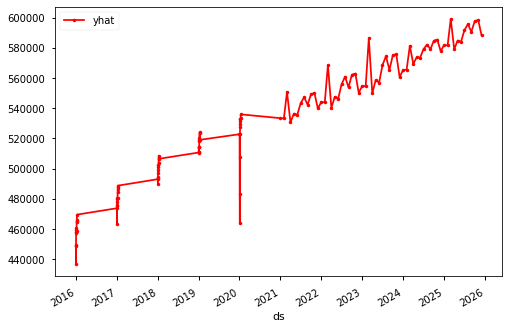

In [52]:
dfnew.plot(kind= 'line', x='ds', y='yhat', color = 'red' , marker = '.' )
plt.savefig("retailUSA.png", dpi=250, bbox_inches='tight')